In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pymiex as pm
from io import StringIO

### Opening optical constants file

In [4]:
with open('ri-data/silicate', 'r') as file:
    tmp = file.read()

s = StringIO(tmp.replace('D', 'e')) # Changing FORTRAN notation to normal
consts = np.loadtxt(s)

### Example 1: calculating single grain size 

The simpliest example is to calculate single grain size distribution. Note that a lot of paramteres in `wrap_mie` here are default values. 

In [5]:
data = pm.wrap_mie(wavelength=consts[:,0], n=consts[:,1], k=consts[:,2], radius=100)
data

{'albedo': array([0.54389541, 0.55366789, 0.62289685, 0.63807286, 0.62530632,
        0.61080752, 0.61382358, 0.60828913, 0.60509146, 0.60325178,
        0.59121193, 0.58337573, 0.5780119 , 0.57320105, 0.56828111,
        0.56494857, 0.56309027, 0.56184879, 0.56097582, 0.56035743,
        0.55989834, 0.55958633, 0.55936825, 0.55921075, 0.55909428,
        0.55900941, 0.55894084, 0.5588913 , 0.55882618, 0.55875976,
        0.55867701, 0.55855446, 0.55840628, 0.55822341, 0.55795814,
        0.55762818, 0.55722294, 0.55671148, 0.55606458, 0.55526346,
        0.55428487, 0.55300314, 0.55132881, 0.54905672, 0.5459572 ,
        0.541647  , 0.5347762 , 0.51930794, 0.54775633, 0.60087548,
        0.61035905, 0.60281839, 0.58890954, 0.56814546, 0.56796415,
        0.58657678, 0.60311656, 0.60771207, 0.60989212, 0.61063741,
        0.61127556, 0.61095422, 0.61018031, 0.60984748, 0.60867153,
        0.60692263, 0.60453847, 0.60159431, 0.59804989, 0.59400842,
        0.58945555, 0.58444584, 0.5787

Let's look at resulting albedo:

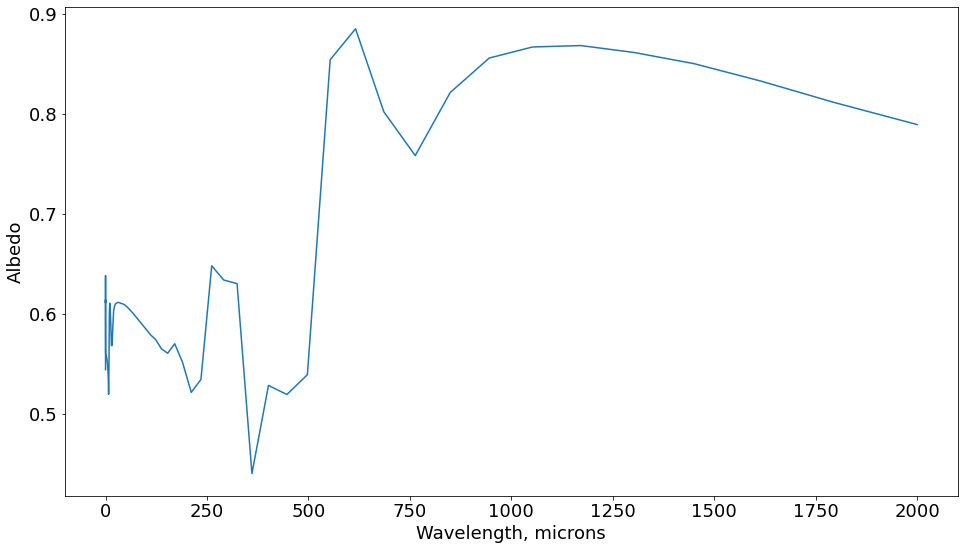

In [6]:
plt.figure(figsize=(16,9))

plt.plot(consts[:,0], data['albedo'])

plt.ylabel('Albedo', fontsize=18)     
plt.xlabel('Wavelength, microns',fontsize=18)           
ax=plt.gca()
ax.tick_params(labelsize=18) 
plt.show()

And a little bit closer:

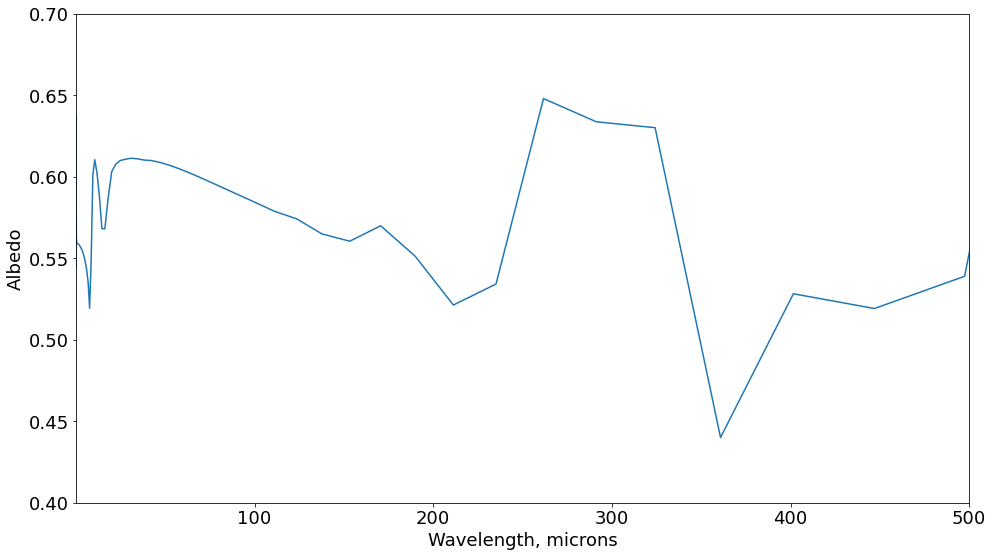

In [7]:
plt.figure(figsize=(16,9))

plt.plot(consts[:,0], data['albedo'])

plt.ylabel('Albedo', fontsize=18)     
plt.xlabel('Wavelength, microns',fontsize=18)           
ax=plt.gca()
ax.tick_params(labelsize=18) 
plt.xlim([0.3, 500])
plt.ylim([0.4, 0.7])
plt.show()

### Example 2: Log-normal distribution

Now let us see how to use log-normal distribution. It is very useful for calculation of reflectance of granular surfaces, since it is basically just densely packed particles with log-normal size distribution.

In [8]:
data = pm.wrap_mie(wavelength=consts[:,0], n=consts[:,1], k=consts[:,2], radius=100, mode='lognormal',
                    radmin=100/10**2, radmax=100*10**2, sigma=0.7)
data

{'albedo': array([0.54377454, 0.55354662, 0.62282056, 0.6380025 , 0.62523708,
        0.61073812, 0.61375662,        nan, 0.60503051, 0.60319568,
        0.59115165, 0.58331068, 0.57794336, 0.57312936, 0.56820665,
        0.56487308, 0.56301517, 0.56177513, 0.56090461, 0.56028976,
        0.55983539, 0.55952942, 0.55931884, 0.55917049, 0.55906499,
        0.55899314, 0.55893989, 0.55890822, 0.55886381, 0.55882126,
        0.55876588, 0.55867459, 0.55856197, 0.55841942, 0.55819973,
        0.55792116, 0.55757371, 0.55712715, 0.55655296, 0.55583336,
        0.55494584, 0.55376653, 0.55220721, 0.55006686, 0.54711853,
        0.54299015, 0.53635704, 0.52136685, 0.54934176, 0.60245757,
        0.61252015, 0.60530699, 0.59160197, 0.57110602, 0.57122601,
        0.59014127, 0.60706022, 0.61196897, 0.61443212, 0.61544809,
        0.61635545, 0.61631492, 0.61584096, 0.61581101, 0.61496336,
        0.61357784, 0.61158722, 0.60907473, 0.60600661, 0.60248018,
        0.59851572, 0.59409481, 0.5893

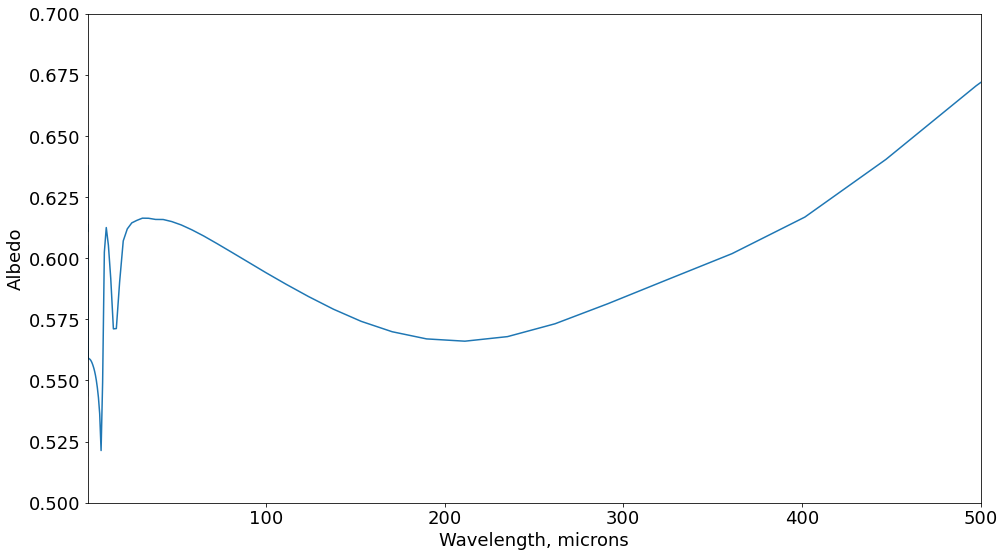

In [9]:
plt.figure(figsize=(16,9))

plt.plot(consts[:,0], data['albedo'])

plt.ylabel('Albedo', fontsize=18)     
plt.xlabel('Wavelength, microns',fontsize=18)           
ax=plt.gca()
ax.tick_params(labelsize=18) 
plt.xlim([0.3, 500])
plt.ylim([0.5, 0.7])
plt.show()

Let's also see what is the effective radius and effective variance of this log-normal distribution and how it looks like:

In [10]:
data['r_eff'], data['v_eff']

(137.4434683995494, 0.1356632444524524)

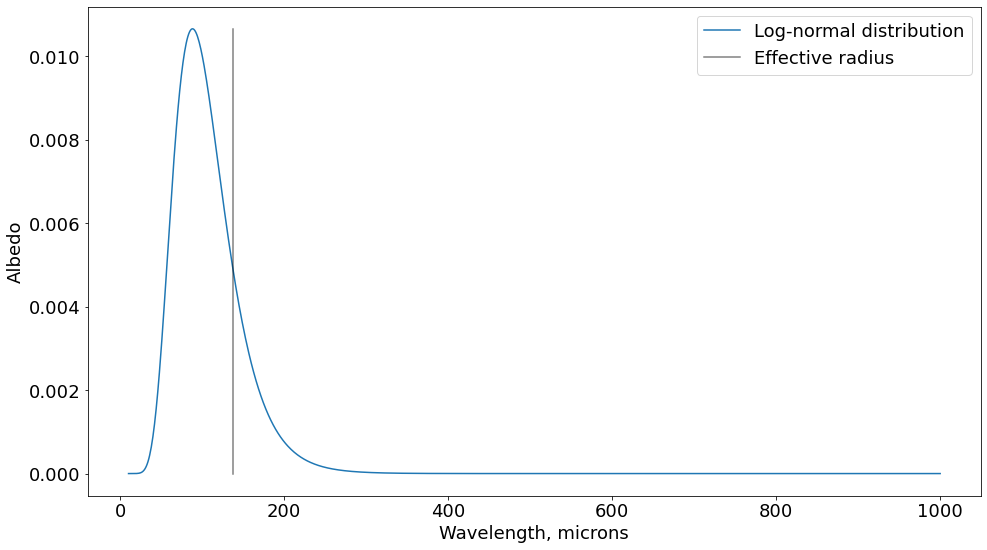

In [11]:
pdf, r_eff, v_eff = pm.lognormal_dist(mu=100, sigma=0.7)
plt.figure(figsize=(16,9))

plt.plot(np.linspace(10, 10**3, 1000), pdf)
plt.plot([r_eff, r_eff], [0, max(pdf)], '-k', alpha=0.5)

plt.ylabel('Albedo', fontsize=18)     
plt.xlabel('Wavelength, microns',fontsize=18)           
ax=plt.gca()
ax.tick_params(labelsize=18) 

plt.legend(['Log-normal distribution', 'Effective radius'], fontsize=18)

plt.show()

Citing Mishchenko's "Multiple Scattering of Light by Particles" (2000):
> Hansen and Travis (1974) and Mishchenko and Travis (1994a) have shown that different moderately broad size distributions that have the same values of $r_{eff}$ and $v_{eff}$ can be expected to have similar dimensionless scattering and absorption characteristics.